<a href="https://colab.research.google.com/github/SmartDogy/Deep-Fried-Learning/blob/main/Early_Stopping_in_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

In [ ]:
X, Y = make_circles(n_samples=1500, noise=0.1)

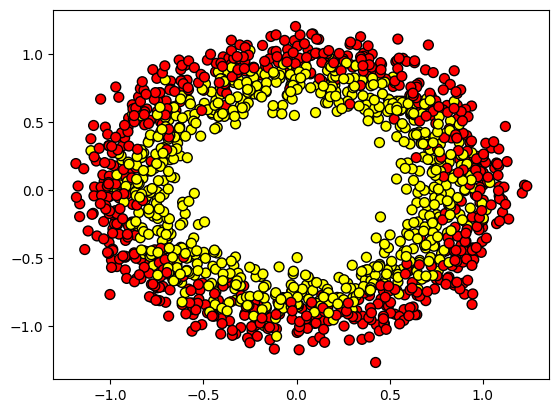

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='autumn', s=50, edgecolors='black')

In [ ]:
model = Sequential([
    Input(shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,825 (7.13 KB)

 Trainable params: 1,825 (7.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    verbose=1,
    patience=4,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=callback)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5567 - val_loss: 0.6890
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4886 - loss: 0.6907 - val_accuracy: 0.6000 - val_loss: 0.6855
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5287 - loss: 0.6848 - val_accuracy: 0.6300 - val_loss: 0.6780
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5823 - loss: 0.6765 - val_accuracy: 0.7200 - val_loss: 0.6652
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6830 - loss: 0.6625 - val_accuracy: 0.7867 - val_loss: 0.6434
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7235 - loss: 0.6382 - val_accuracy: 0.7267 - val_loss: 0.6078
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.6024 - val_accuracy: 0.8400 - val_loss: 0.5590
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7966 - loss: 0.5425 - val_accuracy: 0.8133 - 

Text(0, 0.5, 'loss')

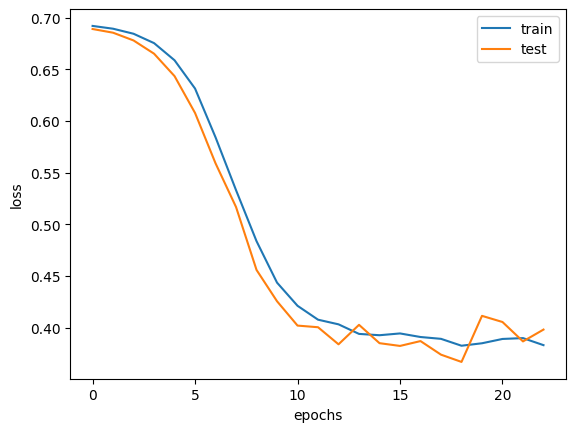

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

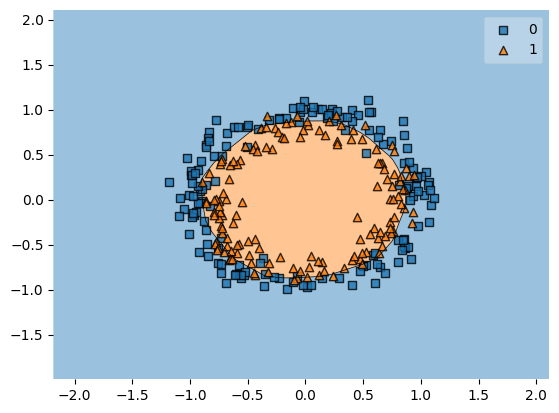

In [ ]:
plot_decision_regions(x_test, y_test, clf=model)

In [ ]:
pred = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
pred = np.concatenate(pred)

In [ ]:
pred = pred.flatten()

In [ ]:
pred = pred.tolist()

In [ ]:
new_pred = []

for value in pred:
  if value > 0.5:
    new_pred.append(1)
  else:
    new_pred.append(0)

In [ ]:
accuracy_score(y_test, new_pred)

0.8433333333333334